<a href="https://colab.research.google.com/github/youmjisun/gachon_3-2/blob/main/4_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#훈련 및 테스트 데이터 준비
데이터 준비
훈련과 데스트 데이터로 분활
정규

In [34]:
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv_data')

fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42)

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

#확률적 경사 하강법(stochatic gradient descent)을 이용한 분류
- skleam.linear_model패키지의 SGDClassifier클래스
  -미니배치 또는 배치 경사 하강법을 지원하지 않음
loss : 손실 함수 종류 지정(log_loss로 지정)

log_loss : 로지스틱 손실 함수를 뜻함

max_iter : 수행할 에포크 횟수 지정(10으로 지정)

훈련

평가

In [35]:
from sklearn.linear_model import SGDClassifier
sc = SGDClassifier(loss='log_loss', max_iter=10, random_state=42)

sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.773109243697479
0.775


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [36]:
#점진적 학습이 가능하므로 추가 훈련 수행
sc.partial_fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8151260504201681
0.85


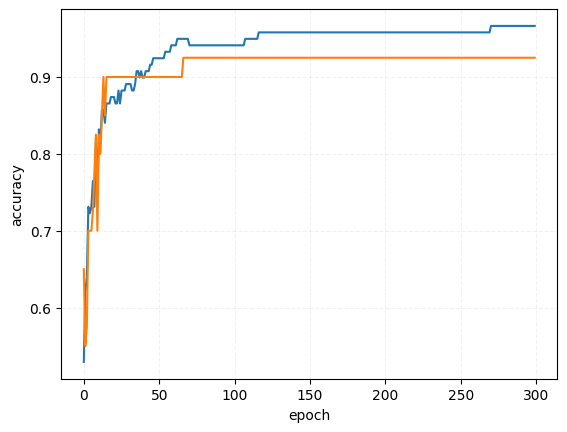

In [37]:
import numpy as np
sc = SGDClassifier(loss='log_loss', random_state=42)
train_score = []
test_score = []
classes = np.unique(train_target)

for _ in range(0, 300):
    sc.partial_fit(train_scaled, train_target, classes=classes)

    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

import matplotlib.pyplot as plt
plt.grid(color = "gray", alpha=0.1, linestyle='--')
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [38]:
#max_iter=100으로 설정하고 다시 SGDClassifier 모델 훈련
sc = SGDClassifier(loss='log_loss', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925


In [39]:
sc = SGDClassifier(loss='hinge', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9495798319327731
0.925


^테스트 점수는 동일하지만

##실습1

In [40]:
#데이터 준비
import pandas as pd
iris = pd.read_csv('https://raw.githubusercontent.com/jmnote/zdata/master/R/iris.csv')
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [41]:
print(iris.isnull().any())

Sepal.Length    False
Sepal.Width     False
Petal.Length    False
Petal.Width     False
Species         False
dtype: bool


Text(0, 0.5, 'Frequency')

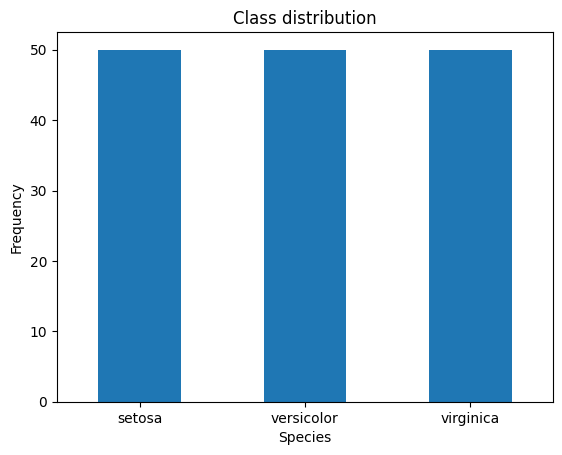

In [42]:
LABELS = ["setosa", "versicolor", "virginica"]

import matplotlib.pyplot as plt

count_classes = pd.value_counts(iris['Species'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Class distribution")
plt.xticks(range(3), LABELS)
plt.xlabel("Species")
plt.ylabel("Frequency")


In [44]:
#클래스 추출
print(pd.unique(iris['Species']))

['setosa' 'versicolor' 'virginica']


In [ ]:
#훈련 세트와 테스트 세트로 나누기
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    iris_input, iris_target, stratify=iris_target, random_state = 42)
print(train_input.shape, test_input.shape)
print(train_target.shape, test_target.shape)
print(test_target)

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(train_input)

In [ ]:
#데이터 표준화
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
fish_target = fish['Species'].to_numpy()
print(fish_input[:5])
print(fish_target[:5])

In [ ]:
#k-최근접 이웃 알고리즘을 이용하여 훈련하고 훈련 세트와 테스트 세트에 대해 평가
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, train_target)

print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

In [ ]:
#테스트 세트의 5개의 데이에 대해서 예측과 확률 알아보기


In [ ]:
#최적화
score_train=[]
score_test=[]

for i in range(2,15):
  kne = KNeighborsClassifier(n_neighbors=i)
  kne.fit(train_scaled, train_target)
  score_tarin.append(kne.score(train_scaled,train_target))
  score_tset.append(kne.score(tset_scaled,test_target))

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
x=np.arange(2,16,1)
plt.plot(x,score_train)
plt.plot(x,score_test)
plt.xlable('|')
plt.ylable('score')
plt.show()

In [ ]:
print(score_train[5], score_test[5])
print(score_train[8], score_test[8])
print(score_train[10], score_test[10])
print(score_train[12], score_test[12])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kne = KNeighborsClassifier(n_nelghbors=7)
kne.fit(train_sacled,train_targer)
print(kne.score(train_scaled,train_targer))
print(kne.score(test_sacled,test_targer))

In [ ]:
#로지스틱 회귀를 이용하여 다중 분류 훈련 및 최적화하기


In [ ]:
#확률적 경사하강법을 이용하여 다중 분류 훈련 및 최적화하기
from sklearn.linear_model import SGDClassifier
